In [1]:
import requests 
import json
import numpy as np
import matplotlib.pyplot as plt
import time
import datetime
import matplotlib.dates as mdates

In [35]:
def get_throughput(node, port, ts=None, te=None):
    out_url = "http://graphite.es.net/snmp/west/%s/interface/%s/out?begin=%d&end=%d&calc=30"% (node, port, ts, te)
    in_url  = "http://graphite.es.net/snmp/west/%s/interface/%s/in?begin=%d&end=%d&calc=30" % (node, port, ts, te)
    r = requests.get(out_url).text
    try:
        res_out = json.loads(r)
    except:
        print(r)
    
    r = requests.get(in_url).text
    res_in = json.loads(r)

    return {'out': np.array(res_out['data']), 'in': np.array(res_in['data'])}


   # verified
alcf2nersc_esnet = (('star-cr5', 'to_anl_hpc_ip-a_v4v6'), ('chic-cr5', 'to_star-cr5_ip-a'), \
                    ('chic-cr5', 'to_star-cr5_ip-b'), ('kans-cr5', 'to_chic-cr5_ip-a'), \
                    ('denv-cr5', 'to_kans-cr5_ip-a'), ('sacr-cr5', 'to_denv-cr5_ip-a'), \
                    ('sunn-cr5', 'to_sacr-cr5_ip-a'), ('sunn-cr5', 'to_nersc_ip-a'))

nersc2alcf_esnet = (('sunn-cr5', 'to_nersc_ip-a'),    ('sacr-cr5', 'to_sunn-cr5_ip-a'),\
                    ('denv-cr5', 'to_sacr-cr5_ip-a'), ('kans-cr5', 'to_denv-cr5_ip-a'),\
                    ('chic-cr5', 'to_kans-cr5_ip-a'), ('star-cr5', 'to_chic-cr5_ip-a'), \
                    ('star-cr5', 'to_chic-cr5_ip-b'), ('star-cr5', 'to_anl_hpc_ip-a_v4v6'))

# verified new path via ELPA
# alcf2nersc_esnet = (('star-cr5', 'to_anl_hpc_ip-a_v4v6'), ('star-cr5', 'to_chic-cr5_ip-a'), \
#                     ('star-cr5', 'to_chic-cr5_ip-b'), ('chic-cr5', 'to_kans-cr5_ip-a'), \
#                     ('kans-cr5', 'to_denv-cr5_ip-a'), \
#                     ('denv-cr5', 'to_albq-cr5_ip-a'), ('albq-cr5', 'to_elpa-cr5_ip-a'), \
#                     ('elpa-cr5', 'to_sunn-cr5_ip-a'), ('sunn-cr5', 'to_nersc_ip-a'))

In [3]:
def get_path_throughput(path, ts, te):
    _ret = {}
    for node, port in path:
        time.sleep(1)
        _thro = get_throughput(node, port, ts, te)
        _ret[(node, port)] = _thro
    return _ret

In [38]:
def parse_result_plot(timeStamp, period = 300):
    _res = get_path_throughput(alcf2nersc_esnet, timeStamp, timeStamp + period)
    plt.close()
    plt.figure(figsize=(12,5))
    for _node in _res:
        node, port = _node
        #legend.append(node + ": " + port)
        s_port = 'to_nersc_ip-a'
        #s_port = 'to_anl_hpc_ip-a_v4v6'
        if port == s_port:
            _out = _res[_node]['out'][:, 1]
            out_thro = _out * 8 / (10**9)
            plt.plot(out_thro, '--', label = node + ": " + port)
            continue
        #print(node)
        print(_node)
        _in = _res[_node]['in'][:, 1]
        #except:
         #   continue
        in_thro = _in * 8 / (10**9)
        #print(in_thro)
        plt.plot(in_thro, label = node + ": " + port)
    plt.legend()
    ax = plt.axes()
    ax.yaxis.grid()
    plt.ylabel("Gb/s")
    plt.show()

In [276]:
timeStamp = 1532032892
p = 10
down

('star-cr5', 'to_chic-cr5_ip-a')
('star-cr5', 'to_chic-cr5_ip-b')
('chic-cr5', 'to_kans-cr5_ip-a')
('kans-cr5', 'to_denv-cr5_ip-a')
('denv-cr5', 'to_albq-cr5_ip-a')
('albq-cr5', 'to_elpa-cr5_ip-a')
('elpa-cr5', 'to_sunn-cr5_ip-a')
('sunn-cr5', 'to_nersc_ip-a')


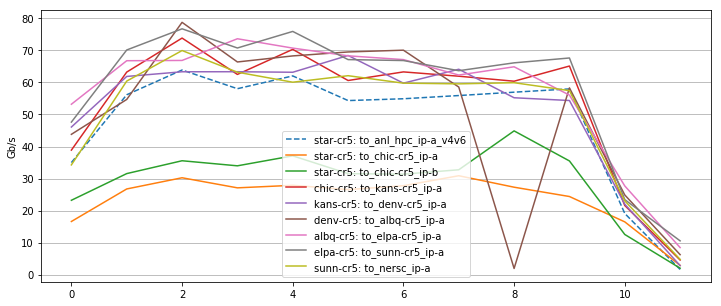

In [277]:
parse_result_plot(timeStamp)

In [267]:
timpStamp = 1532037725
p = 10
up

('sunn-cr5', 'to_nersc_ip-a')
('sacr-cr5', 'to_sunn-cr5_ip-a')
('denv-cr5', 'to_sacr-cr5_ip-a')
('kans-cr5', 'to_denv-cr5_ip-a')
('chic-cr5', 'to_kans-cr5_ip-a')
('star-cr5', 'to_chic-cr5_ip-a')
('star-cr5', 'to_chic-cr5_ip-b')


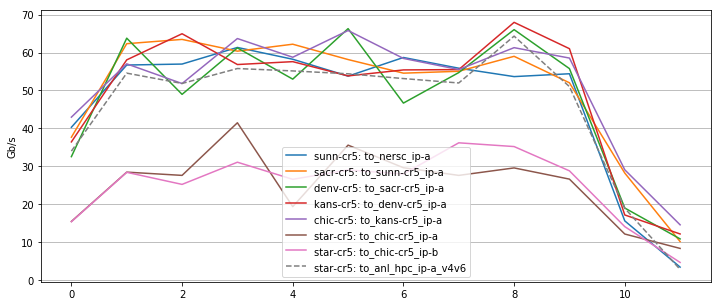

In [268]:
parse_result_plot(timeStamp)

In [269]:
timeStamp = 1532038132
p = 10
up

('sunn-cr5', 'to_nersc_ip-a')
('sacr-cr5', 'to_sunn-cr5_ip-a')
('denv-cr5', 'to_sacr-cr5_ip-a')
('kans-cr5', 'to_denv-cr5_ip-a')
('chic-cr5', 'to_kans-cr5_ip-a')
('star-cr5', 'to_chic-cr5_ip-a')
('star-cr5', 'to_chic-cr5_ip-b')


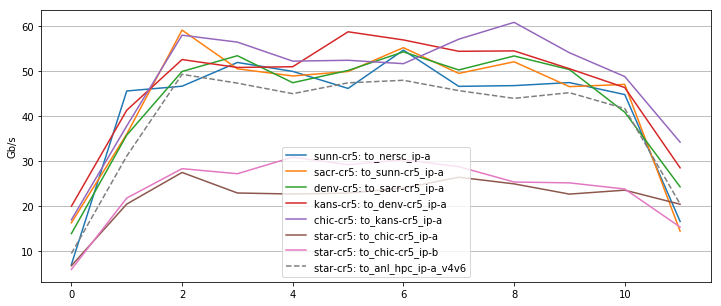

In [270]:
parse_result_plot(timeStamp)

In [235]:
timeStamp = 1532034063
p = 15
down

('star-cr5', 'to_chic-cr5_ip-a')
('star-cr5', 'to_chic-cr5_ip-b')
('chic-cr5', 'to_kans-cr5_ip-a')
('kans-cr5', 'to_denv-cr5_ip-a')
('denv-cr5', 'to_albq-cr5_ip-a')
('albq-cr5', 'to_elpa-cr5_ip-a')
('elpa-cr5', 'to_sunn-cr5_ip-a')
('sunn-cr5', 'to_nersc_ip-a')


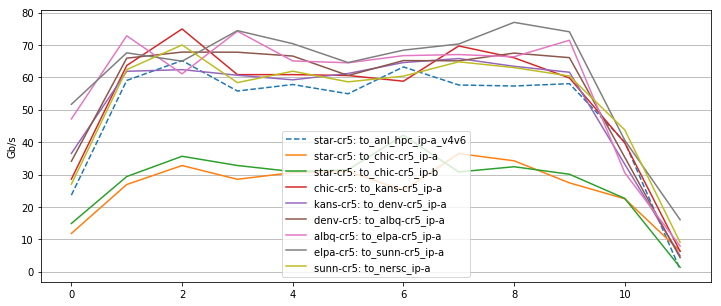

In [236]:
parse_result_plot(timeStamp)

In [241]:
timeStamp = 1532033327
p = 20
down

('star-cr5', 'to_chic-cr5_ip-a')
('star-cr5', 'to_chic-cr5_ip-b')
('chic-cr5', 'to_kans-cr5_ip-a')
('kans-cr5', 'to_denv-cr5_ip-a')
('denv-cr5', 'to_albq-cr5_ip-a')
('albq-cr5', 'to_elpa-cr5_ip-a')
('elpa-cr5', 'to_sunn-cr5_ip-a')
('sunn-cr5', 'to_nersc_ip-a')


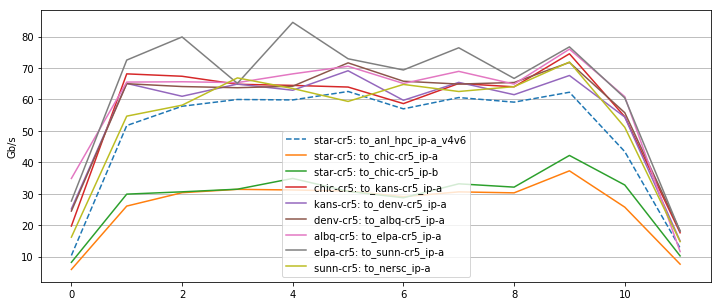

In [242]:
parse_result_plot(timeStamp)

In [263]:
timeStamp = 1532036738
p = 25
up

('sunn-cr5', 'to_nersc_ip-a')
('sacr-cr5', 'to_sunn-cr5_ip-a')
('denv-cr5', 'to_sacr-cr5_ip-a')
('kans-cr5', 'to_denv-cr5_ip-a')
('chic-cr5', 'to_kans-cr5_ip-a')
('star-cr5', 'to_chic-cr5_ip-a')
('star-cr5', 'to_chic-cr5_ip-b')


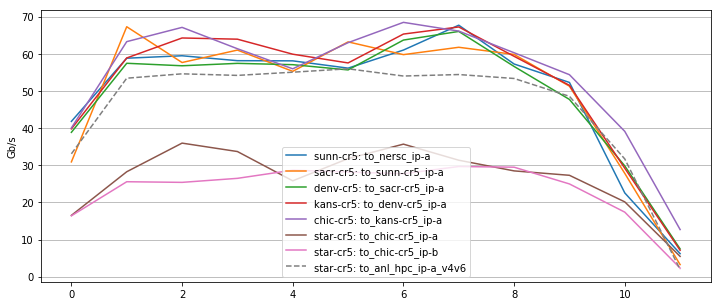

In [264]:
parse_result_plot(timeStamp)

In [265]:
timeStamp = 1532036100
p = 25
up

('sunn-cr5', 'to_nersc_ip-a')
('sacr-cr5', 'to_sunn-cr5_ip-a')
('denv-cr5', 'to_sacr-cr5_ip-a')
('kans-cr5', 'to_denv-cr5_ip-a')
('chic-cr5', 'to_kans-cr5_ip-a')
('star-cr5', 'to_chic-cr5_ip-a')
('star-cr5', 'to_chic-cr5_ip-b')


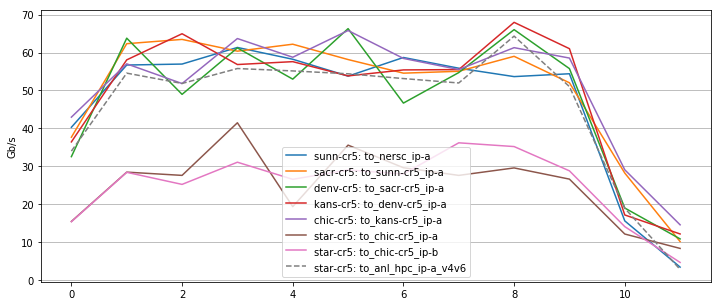

In [266]:
parse_result_plot(timeStamp)

In [293]:
timeStamp = 1532034587
p = 30
#down

('star-cr5', 'to_chic-cr5_ip-a')
('star-cr5', 'to_chic-cr5_ip-b')
('chic-cr5', 'to_kans-cr5_ip-a')
('kans-cr5', 'to_denv-cr5_ip-a')
('denv-cr5', 'to_albq-cr5_ip-a')
('albq-cr5', 'to_elpa-cr5_ip-a')
('elpa-cr5', 'to_sunn-cr5_ip-a')
('sunn-cr5', 'to_nersc_ip-a')


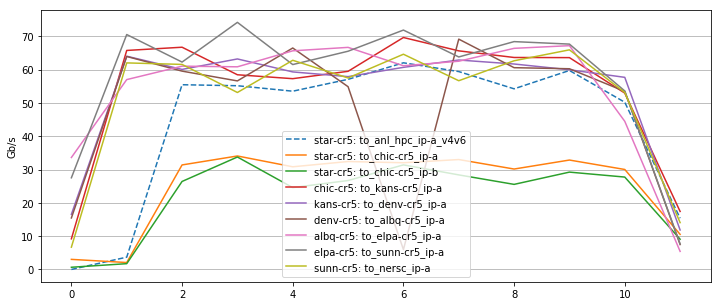

In [297]:
parse_result_plot(timeStamp)

('sunn-cr5', 'to_nersc_ip-a')
('sacr-cr5', 'to_sunn-cr5_ip-a')
('denv-cr5', 'to_sacr-cr5_ip-a')
('kans-cr5', 'to_denv-cr5_ip-a')
('chic-cr5', 'to_kans-cr5_ip-a')
('star-cr5', 'to_chic-cr5_ip-a')
('star-cr5', 'to_chic-cr5_ip-b')


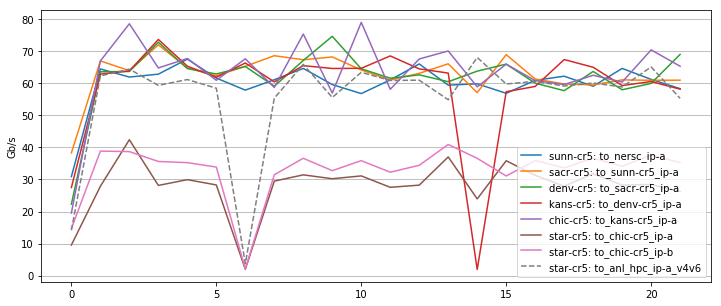

In [310]:
#timeStamp = 1532112432 - 300

timeStamp = 1532112782 - 600
cc = 96
parse_result_plot(timeStamp, period = 600)
# globus transfer nersc zero to alcf null
# speed = 6.34 GB/s

('sunn-cr5', 'to_nersc_ip-a')
('sacr-cr5', 'to_sunn-cr5_ip-a')
('denv-cr5', 'to_sacr-cr5_ip-a')
('kans-cr5', 'to_denv-cr5_ip-a')
('chic-cr5', 'to_kans-cr5_ip-a')
('star-cr5', 'to_chic-cr5_ip-a')
('star-cr5', 'to_chic-cr5_ip-b')


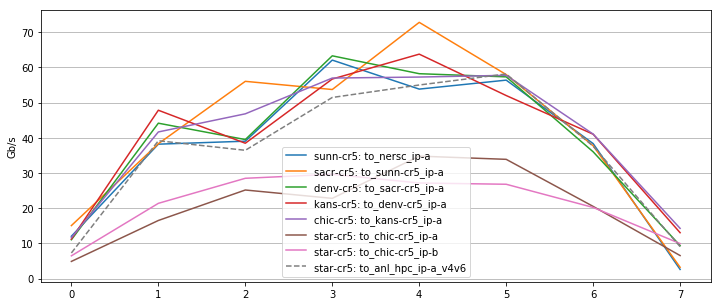

In [313]:
timeStamp = 1532114389 - 178
parse_result_plot(timeStamp, period = 178)
# globus files transfer from nersc to alcf, 1TB data
# speed = 5.50 GB/s

('sunn-cr5', 'to_nersc_ip-a')
('sacr-cr5', 'to_sunn-cr5_ip-a')
('denv-cr5', 'to_sacr-cr5_ip-a')
('kans-cr5', 'to_denv-cr5_ip-a')
('chic-cr5', 'to_kans-cr5_ip-a')
('star-cr5', 'to_chic-cr5_ip-a')
('star-cr5', 'to_chic-cr5_ip-b')


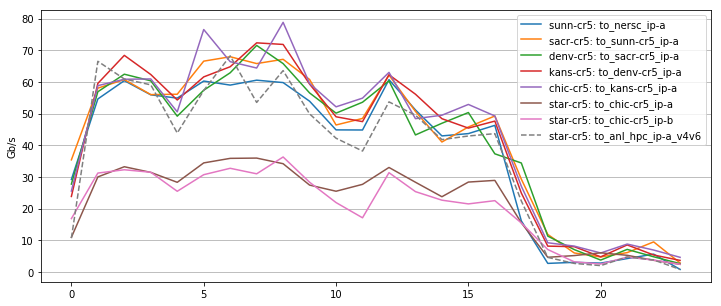

In [312]:
timeStamp = 1532120289 - 669
parse_result_plot(timeStamp, period = 669)
# globus files transfer from nersc to alcf, 3TB data
# speed = 4.89 GB/s

In [340]:
timeStamp = [datetime.datetime.strptime(time,"%Y-%m-%d %H:%M") for time in times]

In [42]:
def plot_speed(speeds, times):
    plt.close()
    speeds = [speed / 1000 for speed in speeds]
    timeStamp = [datetime.datetime.strptime(time,"%Y-%m-%d %H:%M") for time in times]
    dates = mdates.date2num(timeStamp)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d %H:%M"))
    #plt.gca().xaxis.set_major_locator(mdates.DayLocator())
    plt.plot(dates,speeds)
    plt.gcf().autofmt_xdate()
    ax = plt.axes()
    ax.yaxis.grid()
    plt.ylabel("Gb/s")
    plt.show()

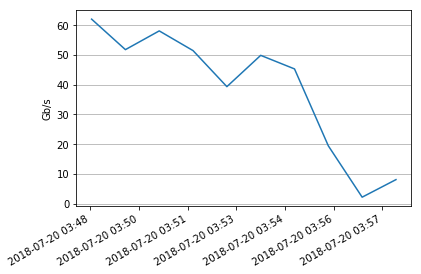

In [43]:
speeds = [8063.94, 2163.99, 19415.96, 45269.95, 49831.02, 39311.66, 51422.05,  58049.65, 51752.55, 62000.77]
speeds = speeds[::-1]
times = ['2018-07-20 03:49', '2018-07-20 03:50', '2018-07-20 03:51', '2018-07-20 03:52', '2018-07-20 03:53', '2018-07-20 03:54', '2018-07-20 03:55', '2018-07-20 03:56', '2018-07-20 03:57', '2018-07-20 03:58']
plot_speed(speeds, times)

('sunn-cr5', 'to_nersc_ip-a')
('sacr-cr5', 'to_sunn-cr5_ip-a')
('denv-cr5', 'to_sacr-cr5_ip-a')
('kans-cr5', 'to_denv-cr5_ip-a')
('chic-cr5', 'to_kans-cr5_ip-a')
('star-cr5', 'to_chic-cr5_ip-a')
('star-cr5', 'to_chic-cr5_ip-b')


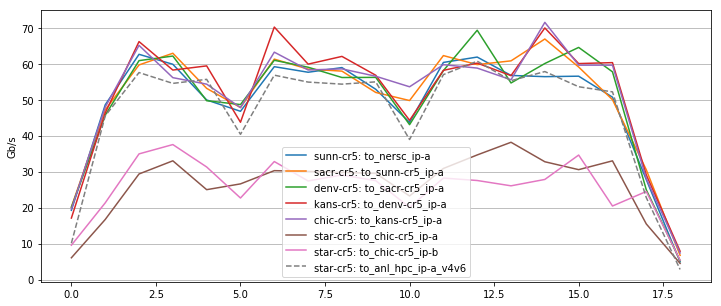

In [6]:
timeStamp = 1532369833
parse_result_plot(timeStamp, period = 512)
# 6.42Gb/s

In [44]:
speeds = [51916.16, 55356.99, 3290.56, 51307.91, 55902.14, 47533.43, 56240.07, 54209.42,  56201.11, 27908.78]
times = ['2018-07-23 01:' + str(i) for i in range(17, 27)]

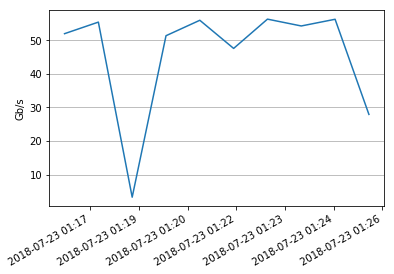

In [45]:
#times
plot_speed(speeds, times)

('sunn-cr5', 'to_nersc_ip-a')
('sacr-cr5', 'to_sunn-cr5_ip-a')
('denv-cr5', 'to_sacr-cr5_ip-a')
('kans-cr5', 'to_denv-cr5_ip-a')
('chic-cr5', 'to_kans-cr5_ip-a')
('star-cr5', 'to_chic-cr5_ip-a')
('star-cr5', 'to_chic-cr5_ip-b')


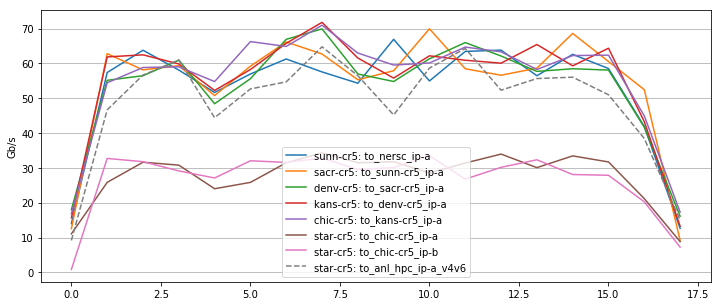

In [22]:
timeStamp = 1532373165
parse_result_plot(timeStamp, period = 487)
# globus files transfer from nersc to alcf, 3TB data
# speed = 6.74 GB/s

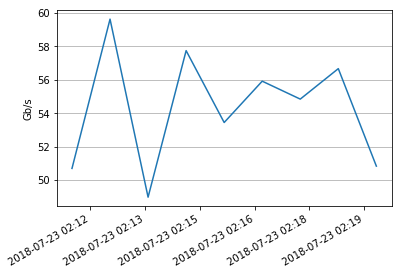

In [46]:
speeds = [50694.43, 59632.4, 48972.69, 57746.12, 53443.52, 55917.81, 54844.54, 56668.66, 50831.78]
times = ['2018-07-23 02:' + str(i) for i in range(12, 12 + len(speeds))]
plot_speed(speeds, times)

('star-cr5', 'to_anl_hpc_ip-a_v4v6')
('chic-cr5', 'to_star-cr5_ip-a')
('chic-cr5', 'to_star-cr5_ip-b')
('kans-cr5', 'to_chic-cr5_ip-a')
('denv-cr5', 'to_kans-cr5_ip-a')
('sacr-cr5', 'to_denv-cr5_ip-a')
('sunn-cr5', 'to_sacr-cr5_ip-a')


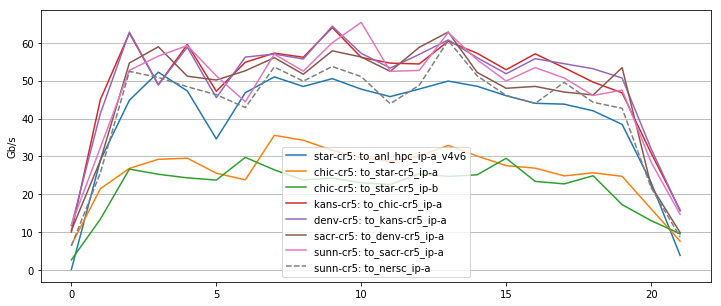

In [47]:
timeStamp = 1532374619
parse_result_plot(timeStamp, period = 593)
# globus files transfer from alcf to nersc, 3TB data
# speed = 5.54 GB/s

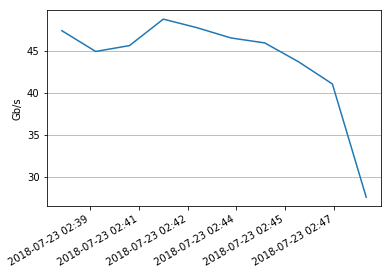

In [48]:
speeds = [47376.35, 44903.86, 45601.01, 48751.96, 47729.67, 46512.58, 45918.92, 43672.03, 41032.88, 27553.33]
times = ['2018-07-23 02:' + str(i) for i in range(39, 39 + len(speeds))]
plot_speed(speeds, times)

('star-cr5', 'to_anl_hpc_ip-a_v4v6')
('chic-cr5', 'to_star-cr5_ip-a')
('chic-cr5', 'to_star-cr5_ip-b')
('kans-cr5', 'to_chic-cr5_ip-a')
('denv-cr5', 'to_kans-cr5_ip-a')
('sacr-cr5', 'to_denv-cr5_ip-a')
('sunn-cr5', 'to_sacr-cr5_ip-a')


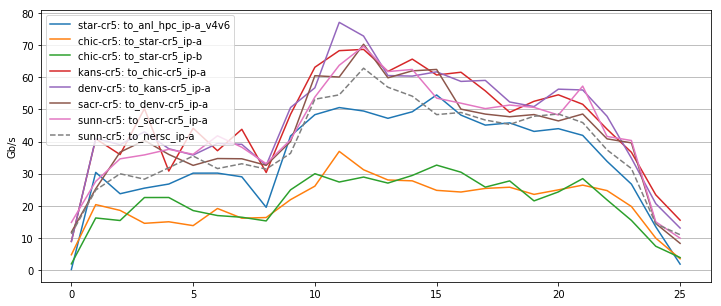

In [49]:
timeStamp = 1532375865
parse_result_plot(timeStamp, period = 713)
# globus files transfer from alcf to nersc, 3TB data
# speed = 4.60 GB/s

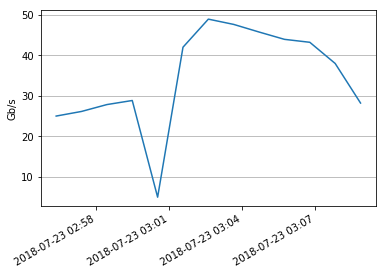

In [52]:
speeds = [25011.84, 26154.01, 27853.0, 28859.69, 4959.89, 42032.36, 48973.94, 47669.83, 45787.39, 43979.15, 43249.72, 38015.72, 28231.58]
times = ['2018-07-23 02:57',  '2018-07-23 02:58', '2018-07-23 02:59'] + ['2018-07-23 03:'+ str(i) for i in range(0, len(speeds)-3)]
plot_speed(speeds, times)